# (Ford GoBike System Data)
## by: REEM ALRASHOUD


### Table of Contents:
    
* [Preliminary Wrangling](#Pre)
* [Univariate Exploration](#Uni)
* [Bivariate Exploration](#Biv)
* [Multivariate Exploration](#Mul)

<a id='Pre'></a>
## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.This dataset will require some data wrangling in order to make it tidy for analysis. There are multiple cities covered by the linked system, and multiple data files will need to be joined together if a full year’s coverage is desired.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load the dataset ( for year 2017 ) and describe its properties:

In [3]:
df_dataset= pd.read_csv('2017-fordgobike-tripdata.csv')

In [4]:
df_dataset.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

In [5]:
print(df_dataset.shape)

(519700, 13)


In [6]:
print(df_dataset.dtypes)

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
dtype: object


In [7]:
df_dataset.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [8]:
df_dataset.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000


In [9]:
# fixing the dtypes problems.
df_dataset.start_time = pd.to_datetime(df_dataset.start_time)
df_dataset.end_time = pd.to_datetime(df_dataset.end_time)
df_dataset.start_station_id = df_dataset.start_station_id.astype(str)
df_dataset.end_station_id = df_dataset.end_station_id.astype(str)
df_dataset.bike_id = df_dataset.bike_id.astype(str)
df_dataset.user_type = df_dataset.user_type.astype('category')

In [10]:
# add some needed columns to make an accurate relations
df_dataset['month'] = df_dataset.start_time.dt.strftime('%b')
df_dataset['day'] = df_dataset.start_time.dt.strftime('%a')
df_dataset['hour'] = df_dataset.start_time.dt.strftime('%H')

In [11]:
df_dataset.drop(axis=1, columns=['start_time','end_time'], inplace=True)

In [12]:
df_dataset.head()

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,month,day,hour
0,80110,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,Dec,Sun,16
1,78800,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,Dec,Sun,15
2,45768,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,Dec,Sun,22
3,62172,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,Dec,Sun,17
4,43603,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,Dec,Sun,14


### What is the structure of your dataset?

> The Data set contains trip data of users in San Francisco Bay Area.There are 519,702 rows of trip in the dataset. Most variables are numeric in nature, but the variables user_type,end and start station names are cateogrical in nature.An important variables is the duration of the trip in seconds. 
> - such of fields: Trip Duration (seconds),Start Time and Date,End Time and Date,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID, User Type (Subscriber "Member" or Customer "Casual"). 
### What is/are the main feature(s) of interest in your dataset?

> - Exploring how much time spent on the bike in SEC?
> - What is the highest classification of user type?
> - What are the most popular top 10 represented end station names in the dataset?
> - Are the weekdays have way more trips than the weekends?
-----------------------------------------------------------
> - what is the Relationship between duration and diffrent user type?
> - What is the relationship between all numeric variables?
> - Can you investigate the relation between the daywise usage of bike in Second?
-----------------------------------------------------------
> - What is The longest trip duration per month for both subscriber and customer?
> - What is the Distribution of trip duartion across user type in different days?
> - What is the best day for every month?


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> There are many features in the dataset can support my investigation, However from my opinion I think the Variables that have the highest influence are : User type , Start Date and End time.

<a id='Uni'></a>
## Univariate Exploration

> In this section, investigate distributions of individual variables. If there is unusual points or outliers, clean things up and look at relationships between variables.

>* **Exploring how much time spent on the bike in SEC?**

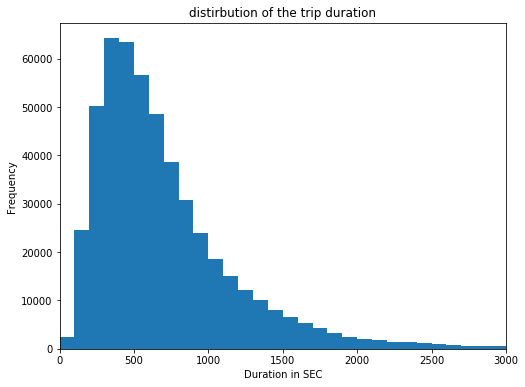

In [13]:
binss = np.arange(0, df_dataset['duration_sec'].max()+100, 100);
plt.figure(figsize = [8,6])
plt.hist(data = df_dataset, x = 'duration_sec', bins = binss)
plt.xlim(0,3000)

plt.title("distirbution of the trip duration")
plt.xlabel("Duration in SEC")
plt.ylabel("Frequency")
plt.show();

From the Right-Skewed plot we can explain the findings.The duration frequency is decreased after a high point of values which is make a very long data tail.The most Frequency duration is around 400.

>* **What is the highest classification of user type?**

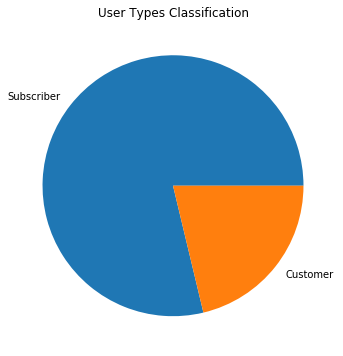

In [14]:
user_types = df_dataset['user_type'].value_counts()
plt.figure(figsize=[8,6])
plt.pie(user_types , labels = user_types.index );

plt.title('User Types Classification');
plt.show();

As we can see the pie plot shows that the Subscriber ( Member) user type is most popular than Customer (Casual)

>* **What are the most popular top 10 represented end station names in the dataset?**

In [15]:
Top_names=df_dataset['end_station_name'].value_counts().nlargest(10)
Top_names

San Francisco Caltrain (Townsend St at 4th St)               17378
San Francisco Ferry Building (Harry Bridges Plaza)           17109
The Embarcadero at Sansome St                                16531
San Francisco Caltrain Station 2  (Townsend St at 4th St)    13658
Montgomery St BART Station (Market St at 2nd St)             13443
Market St at 10th St                                         11298
Powell St BART Station (Market St at 4th St)                 11064
Berry St at 4th St                                           10611
Steuart St at Market St                                       9321
Powell St BART Station (Market St at 5th St)                  8563
Name: end_station_name, dtype: int64

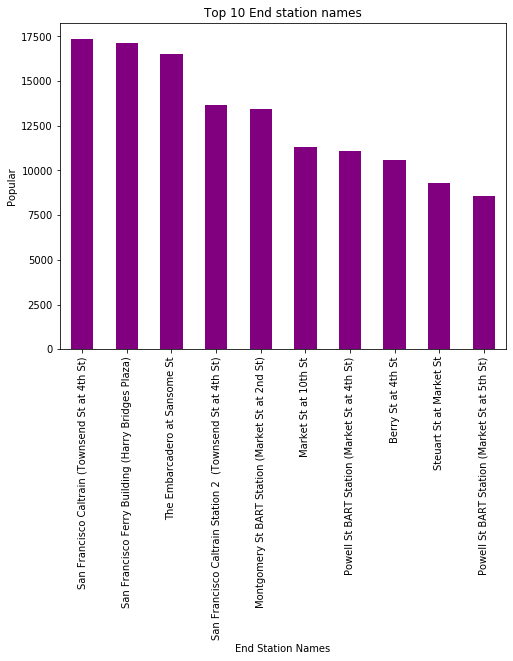

In [16]:
Top_names.plot(kind='bar',figsize=(8,6) ,color="Purple")
plt.xticks(rotation=90)

plt.xlabel('End Station Names')
plt.ylabel('Popular')
plt.title('Top 10 End station names');
plt.show()

After we summrize the most 10 popular end station names , we Find a group of them such as : San Francisco Caltrain, San Francisco Ferry Building, The Embarcadero at Sansome St, San Francisco Caltrain Station 2, Montgomery St BART Station, Market St at 10th St, Powell St BART Station, Berry St at 4th St, Steuart St at Market St, and Powell St BART Station.

>* **Are the weekdays have way more trips than the weekends?**

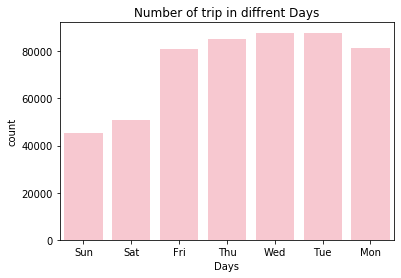

In [17]:
sb.countplot(data=df_dataset, x='day', color='pink');
plt.xlabel('Days')
plt.title('Number of trip in diffrent Days');

From the figure we notice that the weekdays have more trips than weekends.There are some days have Equality in counts such as Wednesday and Tuesday which is above 80000.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> * The duration_sec was skweed and had many points , a scale transformation was requred. Most points were under 1000 SEC.
> * For the user type the subscribers were much more than customers , so I need log transformation.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The data is tidy , All of values are correct and do not need any extra operations to make it suitable.However, I add some needed columns such as : Day , Month , and hour.

<a id='Biv'></a>
## Bivariate Exploration

> In this section, investigate relationships between pairs of variables.

>* **what is the Relationship between duration and diffrent user type?**

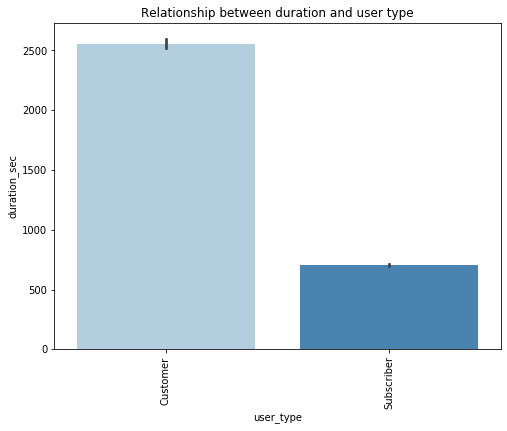

In [18]:
plt.figure(figsize = [8,6])
sb.barplot(data = df_dataset, x = 'user_type', y = 'duration_sec', palette = 'Blues')
plt.xticks(rotation=90)

plt.title('Relationship between duration and user type');
plt.show()

From the plot we see the Customer type has longest duration , however the subscriber has most popularity as the last analysis we did.

>* **What is the relationship between all numeric variables?**

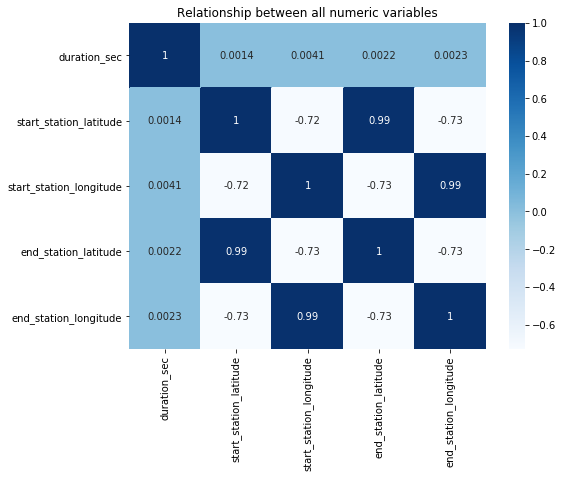

In [25]:
plt.figure(figsize = [8,6])
sb.heatmap(df_dataset.corr(), annot = True,cmap = 'Blues')
plt.title('Relationship between all numeric variables');
plt.show()

From the heatmap plot we can notice that there are lots of negative correlation and few strong correlation.

>* **Can you investigate the relation between the daywise usage of bike in Second?**

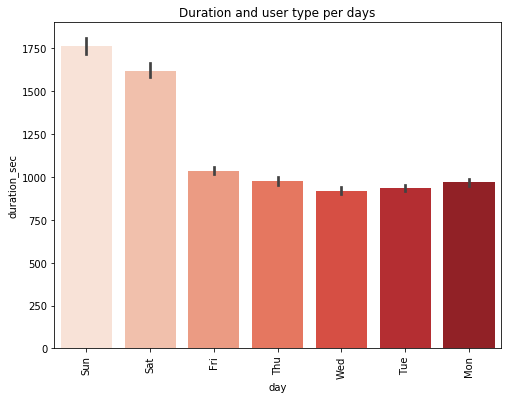

In [20]:
plt.figure(figsize = [8, 6])
sb.barplot(data = df_dataset, x = 'day', y = 'duration_sec', palette = 'Reds')
plt.xticks(rotation=90)
plt.title('Duration and user type per days');
plt.show()

There is a strong relationship between sunday and saturday with the duration that means the bike is used at high level in specific days.About the other days the Usage of bike is normal at moderate level.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>  The subscriber has more trips than customers through all duration. The distribution for the subscribers vary but for the customer, they were very close

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is a strong relationship between sunday and saturday with the duration that means the bike is used at high level in specific days.

<a id='Mul'></a>
## Multivariate Exploration

> In this section, investigate distributions of three or more variables.


>* **What is The longest trip duration per month for both subscriber and customer?**

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


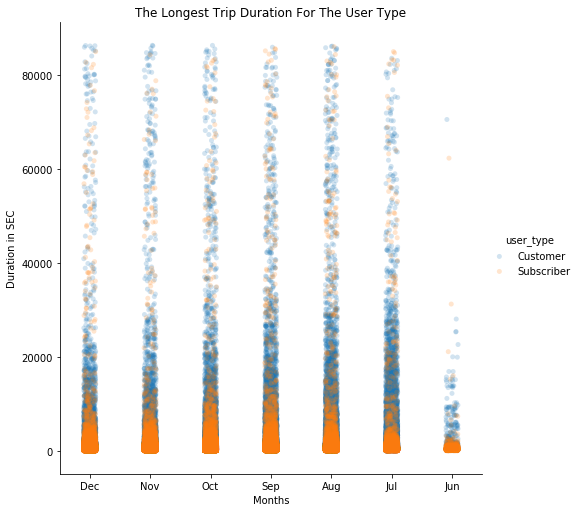

In [21]:
Columns = sb.FacetGrid(data = df_dataset, hue = 'user_type', height = 7)
Columns.map(sb.stripplot, 'month','duration_sec', alpha = 1/5 )
Columns.add_legend();

plt.title("The Longest Trip Duration For The User Type")
plt.xlabel("Months")
plt.ylabel("Duration in SEC");
plt.show();

From the figure we decided that the customer through all of the months has longer trips duration than subscriber.

>* **What is the Distribution of trip duartion across user type in different days?**

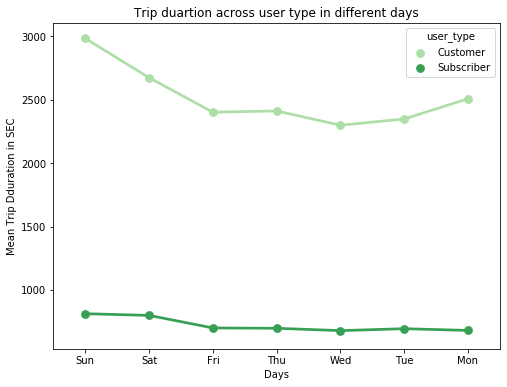

In [22]:
fig = plt.figure(figsize = [8,6])
sb.pointplot(data = df_dataset, x = 'day', y = 'duration_sec', hue = 'user_type', palette = 'Greens', ci=None)

plt.title('Trip duartion across user type in different days')
plt.ylabel('Mean Trip Dduration in SEC')
plt.xlabel('Days')
plt.show();

As we investigate in the previous time , the customer type has the longer trips duration Especially in the sunday which is around 3000. However, the subscriber it is so low and the most highest duration in saturday. 

>* **What is the best day for every month?**

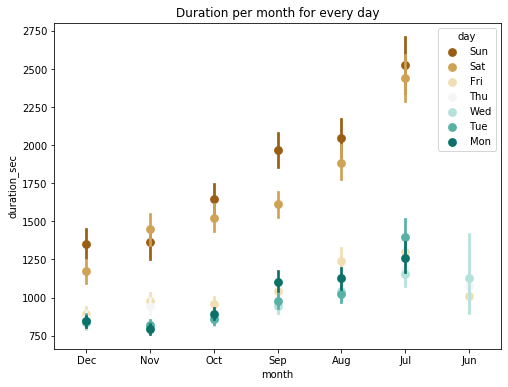

In [24]:
plt.figure(figsize=[8,6])
sb.pointplot(data=df_dataset,x='month',y='duration_sec',hue='day',linestyles='',palette='BrBG')

plt.title("Duration per month for every day");

As we can see for each month there is a special day which is has the longest duration. (December->Sunday), (November->Saturday), (October->Sunday), (September->Sunday), (August->Sunday), (July->Sunday), and (June->Wednesday).

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In the first plot, the customer has longer trips duration than subscriber through all of the months.

### Were there any interesting or surprising interactions between features?

> In the last plot, we find "Sunday" As the preferred day for the most months.